
# **Código Proyecto Algoritmos** 
## **Semestre 2022-I**
Para poder ejecutar el codigo se deben tener en el entorno de ejecución los archivos "CO2.csv", "CP.csv", "KM.csv" y "geolocation.csv"

# **Instalacion de paquetes para el proyecto**

In [4]:
!pip install networkx
!pip install cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 28.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.4 MB 25.4 MB/s 
     |████████████████████████████████| 2.0 MB 47.3 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
  Created wheel for carto

# **Carga de datos**


## **Lectura del dataset "geolocation.csv"**

In [5]:
from geopy import distance
import pandas as pd
import numpy as np
import math

# Leemos el archivo "geolocation.csv" que contiene los datos de latitud y longitud de las 31 ciudades elegidas en el proyecto para poder graficarlas
data = pd.read_csv("geolocation.csv")


# Ajustamos los nombres de las columnas en los datos recibidos de "geolocation.csv"
data.rename(columns={"CountryName": "Country", "CapitalName": "capital", "CapitalLatitude": "lat", "CapitalLongitude": "lon", "CountryCode": "code", "ContinentName": "continent"}, inplace=True)

# Mostramos los datos obtenidos de las ciudades
data

,Country,capital,lat,lon,code,continent
0,Colombia,Bogota,4.600000,-74.083333,CO,Sur America
1,España,Madrid,40.400000,-3.683333,ES,Europa
2,Alemania,Munich,48.137154,11.576124,AL,Europa
3,Reino Unido,Londres,51.500000,-0.083333,GB,Europa
4,Paises Bajos,Amsterdam,52.350000,4.916667,PB,Europa
5,Turquia,Estambul,41.008200,28.978400,TQ,Europa
6,Estados Unidos,Nueva York,40.712800,74.006000,US,Norte America
7,Japan,Tokio,35.683333,139.750000,JP,Asia
8,Brasil,Sao Paulo,23.555800,46.639600,BR,Sur America
9,Brasil,Fortaleza,3.732700,38.527000,BR,Sur America


## **Lectura del dataset "KM.csv"**

In [6]:
# Leemos el archivo "KM.csv" que contiene la información de la distancia de los vuelos directos entre las ciudades elegidas para el proyecto
distanceData = pd.read_csv("KM.csv").set_index('Ciudad')

#Mostramos los datos leidos del archivo "KM.csv". La fila indica la ciudad de la que parte el vuelo, y la columna la ciudad a la que llega.
#Una distancia de 0 indica que no existe el vuelo directo
distanceData

,Bogota,Madrid,Munich,Londres,Amsterdam,Estambul,Nueva York,Tokio,Sao Pablo,Fortaleza,...,Lima,Cancun,Buenos Aires,Hong Kong,Sidney,Manama,New Delhi,Zurich,Ciudad de mexico,Estocolmo
Ciudad,,,,,,,,,,,,,,,,,,,,,
Bogota,0,8020,0,8490,0,0,4007,0,4319,0,...,1889,2293,4664,0,0,0,0,0,3173,0
Madrid,8020,0,1498,1261,1481,2736,5765,0,8384,0,...,9509,7938,10048,0,0,0,0,1247,9062,2593
Munich,0,1484,0,920,668,1582,6485,9385,0,0,...,0,8867,0,0,0,0,5916,241,0,1314
Londres,8490,1261,920,0,359,2500,5565,9574,9494,0,...,0,7956,0,9615,0,5088,6710,779,8926,1435
Amsterdam,8846,1481,668,359,0,2210,5859,0,9805,0,...,10528,8273,11448,9267,0,0,6354,615,9215,1125
Estambul,10747,2736,1582,2500,2210,0,8065,8963,10581,0,...,0,0,12247,8020,0,2591,4548,1766,11424,2172
Nueva York,4009,5765,6485,5565,5859,8065,0,10846,7686,0,...,5876,2490,8527,12945,0,0,11751,6322,3361,6317
Tokio,0,0,9385,9574,9302,8963,10846,0,0,0,...,0,0,0,2892,7817,0,5863,9593,11295,0
Sao Pablo,4323,8384,0,9494,9805,10581,7686,0,0,2369,...,3452,0,1678,0,0,0,0,9621,7431,0


## **Lectura del dataset "CO2.csv"**

In [7]:
# Leemos el archivo "CO2.csv" que contiene la información de la emision en KG de CO2 de los vuelos directos entre las ciudades elegidas para el proyecto
emissionsData = pd.read_csv("CO2.csv").set_index('Ciudad')

#Mostramos los datos leidos del archivo "CO2.csv". La fila indica la ciudad de la que parte el vuelo, y la columna la ciudad a la que llega.
#Una cantidad de 0 indica que no existe el vuelo directo
emissionsData

,Bogota,Madrid,Munich,Londres,Amsterdam,Estambul,Nueva York,Tokio,Sao Paulo,Fortaleza,...,Lima,Cancun,Buenos Aires,Hong Kong,Sidney,Manama,New Delhi,Zurich,Ciudad de mexico,Estocolmo
Ciudad,,,,,,,,,,,,,,,,,,,,,
Bogota,0,771,0,918,0,0,479,0,583,0,...,202,267,589,0,0,0,0,0,324,0
Madrid,771,0,175,140,164,328,640,0,806,0,...,931,957,1117,0,0,0,0,146,868,303
Munich,0,175,0,91,81,169,658,1066,0,0,...,0,950,0,0,0,0,653,69,0,170
Londres,865,139,91,0,62,246,592,1119,880,0,...,0,861,0,1100,0,576,659,102,900,160
Amsterdam,874,159,83,62,0,222,567,0,920,0,...,1121,933,1210,1120,0,0,710,102,926,150
Estambul,1077,319,174,246,222,0,854,1109,1095,0,...,0,0,1126,1012,0,255,569,184,1157,293
Nueva York,483,613,682,591,567,852,0,1228,822,0,...,659,279,918,1426,0,0,1223,643,406,705
Tokio,0,0,1090,1119,1192,1209,1258,0,0,0,...,0,0,0,331,998,0,829,1192,1187,0
Sao Paulo,544,764,0,907,961,1226,822,0,0,267,...,507,0,196,0,0,0,0,946,770,0


## **Lectura del dataset "CP.csv"**

In [8]:
#Leemos el archivo "CP.csv" que contiene la información del calculo de la relacion Emisiones/Distancia (CO2/KM) de los vuelos directos entre las ciudades elegidas para el proyecto
globalData = pd.read_csv("CP.csv", decimal=",").set_index('Ciudad').astype(float)

#Mostramos los datos leidos del archivo "CP.csv". La fila indica la ciudad de la que parte el vuelo, y la columna la ciudad a la que llega.
#Una cantidad de 10000 indica que no existe el vuelo directo
globalData

,Bogota,Madrid,Munich,Londres,Amsterdam,Estambul,Nueva York,Tokio,Sao Paulo,Fortaleza,...,Lima,Cancun,Buenos Aires,Hong Kong,Sidney,Manama,New Delhi,Zurich,Ciudad de mexico,Estocolmo
Ciudad,,,,,,,,,,,,,,,,,,,,,
Bogota,10000.00,0.10,10000.00,0.11,10000.00,10000.00,0.12,10000.00,0.13,10000.00,...,0.11,0.12,0.13,10000.00,10000.00,10000.00,10000.00,10000.00,0.10,10000.00
Madrid,0.10,10000.00,0.12,0.11,0.11,0.12,0.11,10000.00,0.10,10000.00,...,0.10,0.12,0.11,10000.00,10000.00,10000.00,10000.00,0.12,0.10,0.12
Munich,10000.00,0.12,10000.00,0.10,0.12,0.11,0.10,0.11,10000.00,10000.00,...,10000.00,0.11,10000.00,10000.00,10000.00,10000.00,0.11,0.29,10000.00,0.13
Londres,0.10,0.11,0.10,10000.00,0.17,0.10,0.11,0.12,0.09,10000.00,...,10000.00,0.11,10000.00,0.11,10000.00,0.11,0.10,0.13,0.10,0.11
Amsterdam,0.10,0.11,0.12,0.17,10000.00,0.10,0.10,10000.00,0.09,10000.00,...,0.11,0.11,0.11,0.12,10000.00,10000.00,0.11,0.17,0.10,0.13
Estambul,0.10,0.12,0.11,0.10,0.10,10000.00,0.11,0.12,0.10,10000.00,...,10000.00,10000.00,0.09,0.13,10000.00,0.10,0.13,0.10,0.10,0.13
Nueva York,0.12,0.11,0.11,0.11,0.10,0.11,10000.00,0.11,0.11,10000.00,...,0.11,0.11,0.11,0.11,10000.00,10000.00,0.10,0.10,0.12,0.11
Tokio,10000.00,10000.00,0.12,0.12,0.13,0.13,0.12,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,0.11,0.13,10000.00,0.14,0.12,0.11,10000.00
Sao Paulo,0.13,0.09,10000.00,0.10,0.10,0.12,0.11,10000.00,10000.00,0.11,...,0.15,10000.00,0.12,10000.00,10000.00,10000.00,10000.00,0.10,0.10,10000.00


In [9]:
# Creamos las estructuras de datos para almacenar nuestras ciudades
cities = []
for index, row in distanceData.iterrows():
  cities.append(index)

# **Visualización del grafo**

Para la visualización del grafo se emplea la librería NetworkX.

In [10]:
import networkx as nx 
distanceGraph = nx.from_pandas_adjacency(distanceData)

emissionsGraph = nx.from_pandas_adjacency(distanceData)

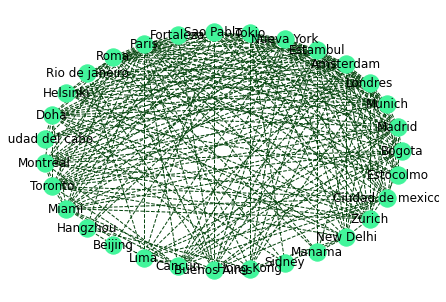

<Figure size 2160x2160 with 0 Axes>

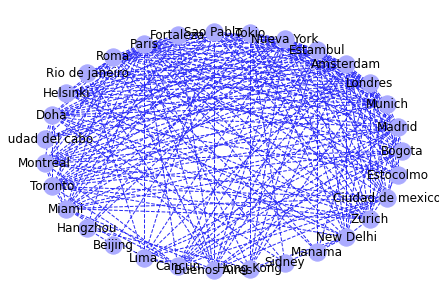

<Figure size 2160x2160 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt 
# Grafico de distancias
nx.draw_circular(distanceGraph, node_color='#42f59b', with_labels=True, edge_color='#074710', label="Graph Representation for Cities Dataframe", style='dashed')
plt.figure(figsize=(30,30)) 
plt.show()
print('\n\n\n')
# Grafico de emisiones
nx.draw_circular(emissionsGraph, node_color='#ababff', with_labels=True, edge_color='#2a2af7', label="Graph Representation for Cities Dataframe", style='dashed')
plt.figure(3,figsize=(30,30)) 
plt.show()

# **Creación del grafo usando una estructura propia**

## **Definición de la estructura del grafo**

In [12]:
from collections import defaultdict

class Graph():
    def __init__(self):
        """
        self.edges is a dict of all possible next nodes
        e.g. {'X': ['A', 'B', 'C', 'E'], ...}
        self.weights has all the weights between two nodes,
        with the two nodes as a tuple as the key
        e.g. {('X', 'A'): 7, ('X', 'B'): 2, ...}
        """
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are bi-directional
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight
        

In [13]:
# Turn distances to dictionary
distanceDict = {}
# Iterate over each row
for row in range(distanceData.shape[0]):
  org = cities[row]
  distanceDict[org] = {}
  for col in range(distanceData.shape[1]):
      dst = cities[col]
      if  distanceData.iloc[row][col] != 0:
        distanceDict[org][dst] = distanceData.iloc[row][col]


# Turn emissions to dictionary 
emissionsDict = {}
# Iterate over each row
for row in range(distanceData.shape[0]):
  org = cities[row]
  emissionsDict[org] = {}
  for col in range(distanceData.shape[1]):
      dst = cities[col]
      if  emissionsData.iloc[row][col] != 0:
        emissionsDict[org][dst] = emissionsData.iloc[row][col]

# Turn relation Emisions/KM to dict
parameterDict = {}
# Iterate over each row
for row in range(distanceData.shape[0]):
  org = cities[row]
  parameterDict[org] = {}
  for col in range(distanceData.shape[1]):
      dst = cities[col]
      
      if  globalData.iloc[row][col] != 0 and globalData.iloc[row][col] != 10000:
        parameterDict[org][dst] = globalData.iloc[row][col]

Se añaden las ciudades al grafo

In [14]:
distanceGraph = Graph()

for origin in distanceDict.keys():
  for destination in distanceDict[origin]:
    if  distanceDict[origin][destination] != None and distanceDict[origin][destination] != np.nan and distanceDict[origin][destination] != 0:
      distanceGraph.add_edge(origin, destination, distanceDict[origin][destination])

emissionsGraph = Graph()

for origin in emissionsDict.keys():
  for destination in emissionsDict[origin]:
    if  emissionsDict[origin][destination] != None and emissionsDict[origin][destination] != np.nan and emissionsDict[origin][destination] != 0:
      emissionsGraph.add_edge(origin, destination, emissionsDict[origin][destination])

parameterGraph = Graph()

for origin in parameterDict.keys():
  for destination in parameterDict[origin]:
    if  parameterDict[origin][destination] != None and parameterDict[origin][destination] != np.nan and parameterDict[origin][destination] != 10000:
      parameterGraph.add_edge(origin, destination, parameterDict[origin][destination])


## **Dijsktra para encontrar el path más corto**

In [15]:
def dijsktra(graph, initial, end): #O(cantidad_Ciudades)^2 | O(n^2)
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()
    
    while current_node != end: #O(cantidad_Ciudades)^2 | O(n^2)
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations: #O(cantidad_Ciudades) | O(n)
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited} # O(cantidad_Ciudades)| O(n)
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
    # Work back through destinations in shortest path
    path = []
    while current_node is not None: #O(cantidad_Ciudades) | O(n)
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

#**Ejecución del algoritmo y graficación del resultado en mapas**

##**Ingreso de la ciudad de origen y de destino del vuelo y ejecución de los algoritmos**

In [16]:
#Se ingresan la ciudad de origen y de destino
origen = 'Bogota'
destino = 'Sidney'

#Se calcula la ruta para reducir la distancia de vuelo entre la ciudad de origen y de destino
distanceResult = dijsktra(distanceGraph, origen, destino)

#Se calcula la ruta para reducir las emisiones de vuelo entre la ciudad de origen y de destino
emissionsResult = dijsktra(emissionsGraph, origen, destino)

#Se calcula la ruta para reducir la relacion Emisiones/Distancia (CO2/KM) de los vuelos entre la ciudad de origen y de destino
combinedResult = dijsktra(parameterGraph, origen, destino)

## **Graficas**

In [17]:
from collections import OrderedDict

def sortDictionary(dictionary, listorder):
  sortedDict = OrderedDict()
  for key in listorder:
    sortedDict[key] = dictionary[key]
  return sortedDict

def sortDictionaryIdx(dictionary, nameDict, listorder):
  sortedDict = OrderedDict()
  i = 0
  for key in listorder:
    sortedDict[i] = nameDict[key]
    i += 1
  return sortedDict

### **Mapa Distancias**

In [18]:
# Dataframe de las ciudades con sus latitudes y longitudes
mapIndexes = {}
mapNames = {}
i = 0
for index, row in data.iterrows():
  if row["capital"] in distanceResult:
    mapIndexes[i] = [row["lat"], row["lon"]]
    mapNames[row["capital"]] = [row["lat"], row["lon"]]
    i += 1

mapNames = sortDictionary(mapNames, distanceResult)
mapIndexes = sortDictionaryIdx(mapIndexes, mapNames, distanceResult)

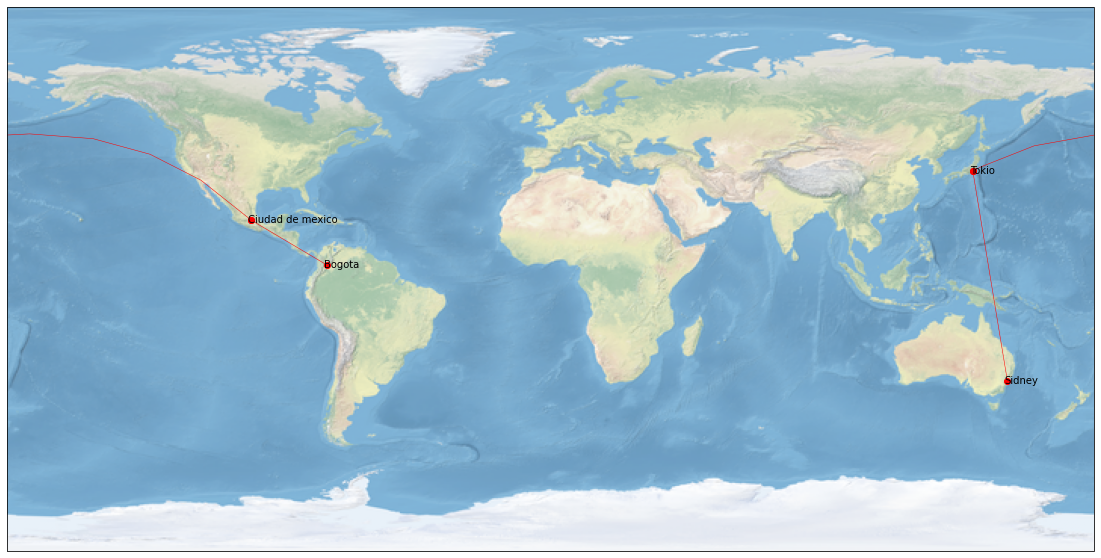

['Bogota', 'Ciudad de mexico', 'Tokio', 'Sidney']


In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# Plot routes
for i in range(len(distanceResult)-1):
  plt.plot([mapIndexes[i][1], mapIndexes[i+1][1]], [mapIndexes[i][0], mapIndexes[i+1][0]],
         color='red', linewidth=0.5, marker='o',
         transform=ccrs.Geodetic(),
         )
# Plot city names
for city in distanceResult:
  plt.text(mapNames[city][1] - 1, mapNames[city][0] - 1, city,
         transform=ccrs.Geodetic())
plt.show()
print(distanceResult)

### **Mapa Emisiones**

In [20]:
# Dataframe de las ciudades con sus latitudes y longitudes
mapIndexesE = {}
mapNamesE = {}
i = 0
for index, row in data.iterrows():
  if row["capital"] in emissionsResult:
    mapIndexesE[i] = [row["lat"], row["lon"]]
    mapNamesE[row["capital"]] = [row["lat"], row["lon"]]
    i += 1
mapNamesE = sortDictionary(mapNamesE, emissionsResult)
mapIndexesE = sortDictionaryIdx(mapIndexesE, mapNamesE, emissionsResult)


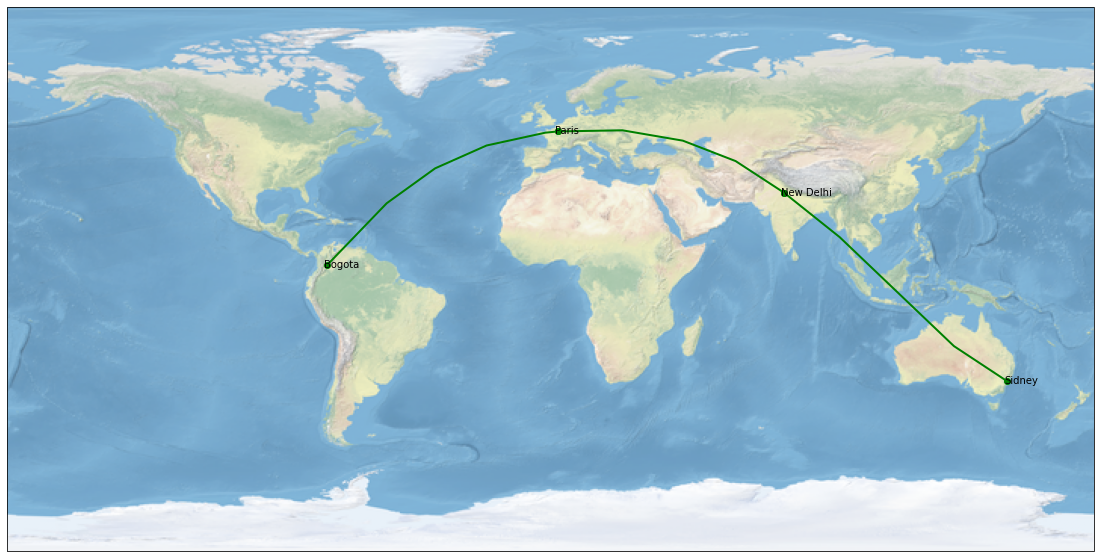

['Bogota', 'Paris', 'New Delhi', 'Sidney']


In [21]:
plt.figure(figsize=(20,10)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
for i in range(len(emissionsResult)-1):
  plt.plot([mapIndexesE[i][1], mapIndexesE[i+1][1]], [mapIndexesE[i][0], mapIndexesE[i+1][0]],
         color='green', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )
for city in emissionsResult:
  plt.text(mapNamesE[city][1] - 1, mapNamesE[city][0] - 1, city,
         
         transform=ccrs.Geodetic())

plt.show()
print(emissionsResult)

### **Mapa Emisiones/Distancia (CO2/KM)**

In [22]:
# Dataframe de las ciudades con sus latitudes y longitudes
mapIndexesC = {}
mapNamesC = {}
i = 0
for index, row in data.iterrows():
  if row["capital"] in combinedResult:
    mapIndexesC[i] = [row["lat"], row["lon"]]
    mapNamesC[row["capital"]] = [row["lat"], row["lon"]]
    i += 1
    
mapNamesC = sortDictionary(mapNamesC, combinedResult)
mapIndexesC = sortDictionaryIdx(mapIndexesC, mapNamesC, combinedResult)


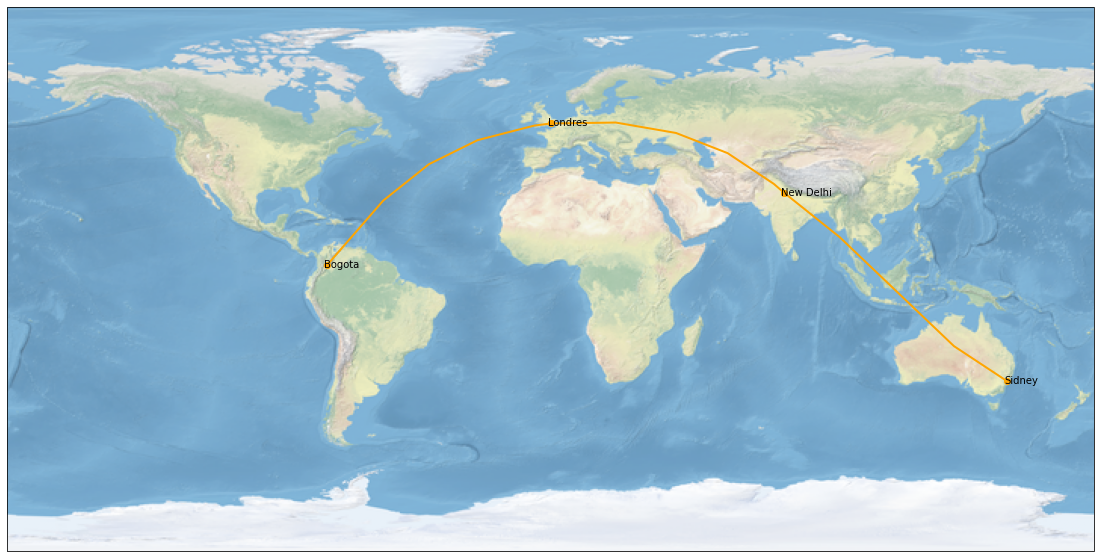

['Bogota', 'Londres', 'New Delhi', 'Sidney']


In [23]:
plt.figure(figsize=(20,10)) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
for i in range(len(combinedResult)-1):
  plt.plot([mapIndexesC[i][1], mapIndexesC[i+1][1]], [mapIndexesC[i][0], mapIndexesC[i+1][0]],
         color='orange', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )
for city in combinedResult:
  plt.text(mapNamesC[city][1] - 1, mapNamesC[city][0] - 1, city,
         transform=ccrs.Geodetic())

plt.show()
print(combinedResult)

**Nota**: Se observa que en este caso, si se quiere minimizar la distancia de vuelo de Bogota a Sidney se debe tomar la ruta ['Bogota', 'Ciudad de mexico', 'Tokio', 'Sidney'].

En cambio, si se quiere minimizar las emisiones de CO2 y la relacion Emisiones/Distancia (CO2/KM) de los vuelos para ir de Bogotá a Sidney se debe tomar la ruta ['Bogota', 'Londres', 'New Delhi', 'Sidney'] 